In [1]:
# Importing necessary library
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [50]:
# Get the file name having the data set given for this case study
file_name = "train.csv"

# Read the CSV file
df = pd.read_csv(file_name)

In [51]:
# Analyse first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
# Check the dataframe
df.shape

(1460, 81)

In [53]:
# Distribution of numerical values
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
#missing_values
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Missing Value treatment

In [56]:
# Fill missing values in the 'LotFrontage' column using the median of the 'LotFrontage' based on the 'Neighborhood':
# Group by 'Neighborhood' and calculate the median of 'LotFrontage' for each group

# To fill missing values in the 'LotFrontage' column using the median of 'LotFrontage' based on the 'Neighborhood', we can use the following code in Python with pandas:
    
def fill_null_with_median(df, column_name, group_by_column):
  grouped_df = df.groupby(group_by_column)[column_name].median()
  df[column_name].fillna(grouped_df, inplace=True)
  return df

df = fill_null_with_median(df, 'LotFrontage', 'Neighborhood')


In [10]:
# To check if there are any remaining missing values in the 'LotFrontage' column, we can use the following code:  
df['LotFrontage'].isnull().sum()

259

In [57]:
# To check if there are any remaining missing values in 'LotFrontage' and to provide a strategy to treat them if they exist, 
# Strategy to treat remaining missing values
missing_values = df['LotFrontage'].isnull().sum()

if missing_values > 0:
  # If there are still missing values, one strategy is to drop the rows with missing values:
  df.dropna(subset=['LotFrontage'], inplace=True)


In [58]:
# Check if there are any remaining missing values
df['LotFrontage'].isnull().sum()

0

In [59]:
#'Alley': Many values are missing. It might be better to create a new category 'NoAlley' to indicate no alley access.

# Create a new category 'NoAlley' for missing values in the 'Alley' column
df['Alley'].fillna('NoAlley', inplace=True)


In [60]:
# Check if there are any remaining missing values
df['Alley'].isnull().sum()

0

In [61]:
# MasVnrType and MasVnrArea: Missing values can be replaced with 'None' for MasVnrType and 0 for MasVnrArea.

df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)


In [62]:
# Check if there are any remaining missing values
df['MasVnrType'].isnull().sum()

0

In [63]:
# Check if there are any remaining missing values
df['MasVnrArea'].isnull().sum()

0

In [64]:
# Fill missing values in basement-related features with 'NoBasement'
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    df[col] = df[col].fillna('NoBasement')

# Verify that there are no remaining missing values in basement-related features
missing_basement = df[basement_cols].isnull().sum()
missing_basement


BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [65]:
# Fill the single missing value in 'Electrical' with the most frequent category
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

# Verify that there are no remaining missing values in 'Electrical'
df['Electrical'].isnull().sum()

0

In [66]:
# Fill missing values in 'FireplaceQu' with 'NoFireplace'
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

# Verify that there are no remaining missing values in 'FireplaceQu'
df['FireplaceQu'].isnull().sum()


0

In [67]:
# List of garage-related features
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageCars', 'GarageArea']

# Fill missing values in garage-related features
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('NoGarage')

# Fill missing values in numerical garage-related features with 0
for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    df[col] = df[col].fillna(0)

# Verify that there are no remaining missing values in garage-related features
missing_garage = df[garage_cols].isnull().sum()
missing_garage


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [68]:
df['PoolQC'] = df['PoolQC'].fillna('NoPool')

In [69]:
# Verify that there are no remaining missing values in 'PoolQC'
df['PoolQC'].isnull().sum()

0

In [70]:
df['Fence'] = df['Fence'].fillna('NoFence')
df['Fence'].isnull().sum()

0

In [71]:
# Fill missing values in 'MiscFeature' with 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')
# Verify that there are no remaining missing values in 'MiscFeature'
df['MiscFeature'].isnull().sum()

0

In [72]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

# Convert Categorical Variables:

In [73]:
# Identify categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object']).columns
# Numerical variables
numerical_vars = df.select_dtypes(include=['int64','float64']).columns

print("Categorical variables:\n ", categorical_vars)
print("Numerical variables:\n ", numerical_vars)

Categorical variables:
  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical variables:
  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',

In [74]:
# Convert categorical variables to dummy variables
df_dummies = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the dataframe with dummy variables
df_dummies.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [75]:
# Derive a new metric 'SaleAge'
df['SaleAge'] = df['YrSold'] - df['YearBuilt']

# Display the first few rows to see the new feature
df[['YrSold', 'YearBuilt', 'SaleAge']].head()


,YrSold,YearBuilt,SaleAge
0,2008,2003,5
1,2007,1976,31
2,2008,2001,7
3,2006,1915,91
4,2008,2000,8


In [76]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleAge
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8


In [77]:
# Convert any boolean columns to numerical (1 and 0)
bool_cols = df_dummies.select_dtypes(include=['bool']).columns
df_dummies[bool_cols] = df_dummies[bool_cols].astype(int)

# Verify the conversion
df_dummies[bool_cols].head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


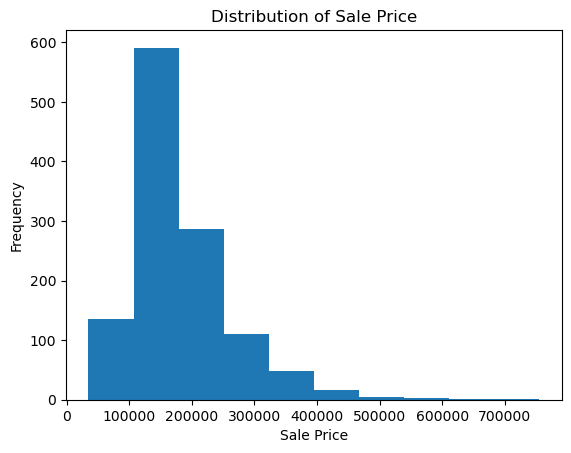

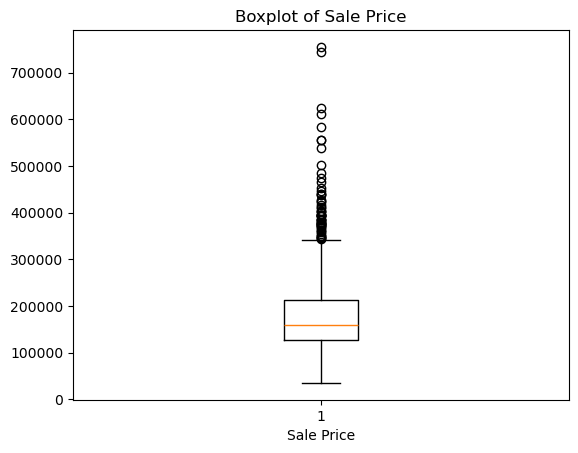

C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


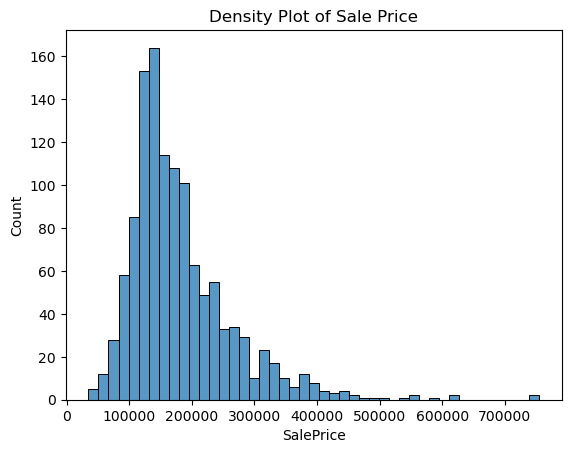

In [78]:
#Analyze the distribution of each variable using histograms, boxplots, and density plots

# Histogram for 'SalePrice'
plt.hist(df['SalePrice'])
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

# Boxplot for 'SalePrice'
plt.boxplot(df['SalePrice'])
plt.xlabel('Sale Price')
plt.title('Boxplot of Sale Price')
plt.show()

# Density plot for 'SalePrice'
sns.histplot(df['SalePrice'])
plt.title('Density Plot of Sale Price')
plt.show()



# Step 1: Understand the Distribution of the Target Variable (SalePrice)

C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


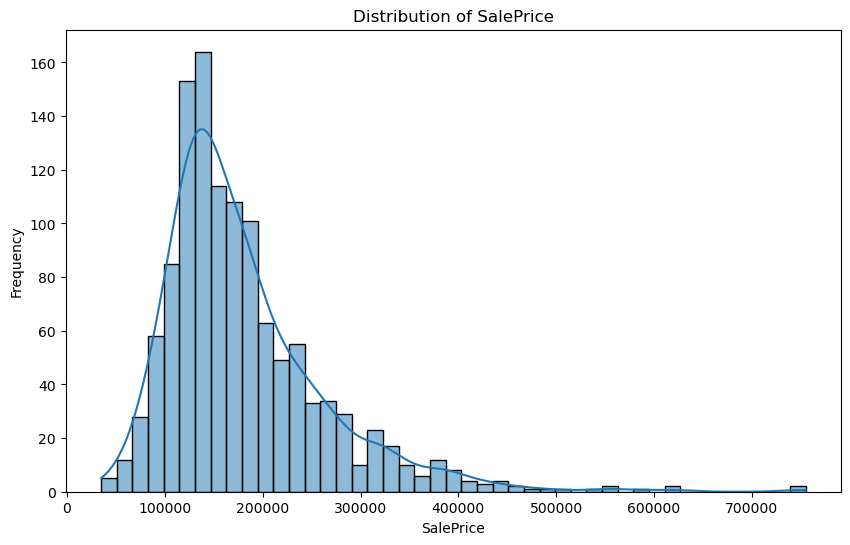

In [79]:
# Plot the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


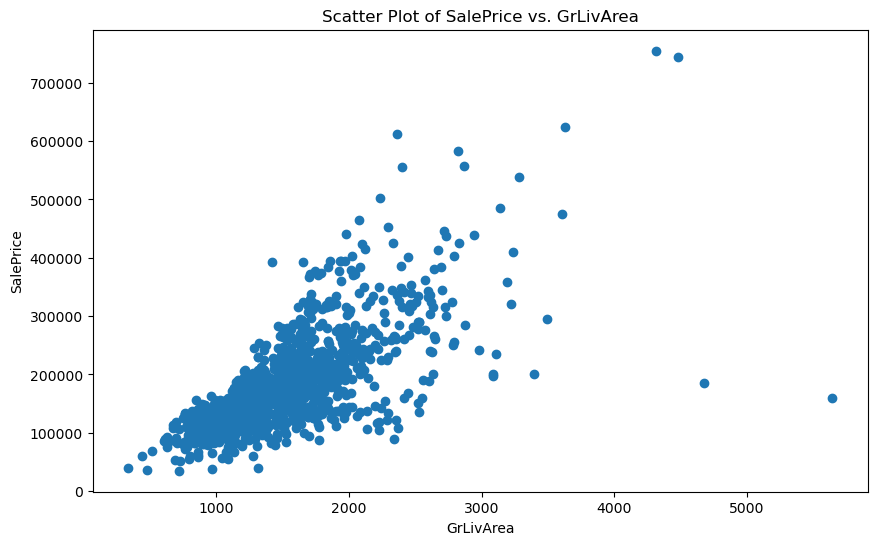

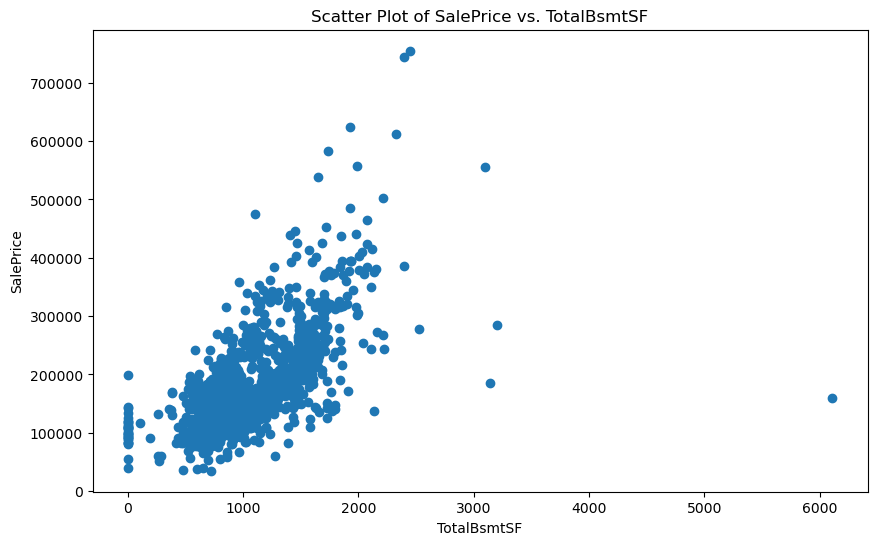

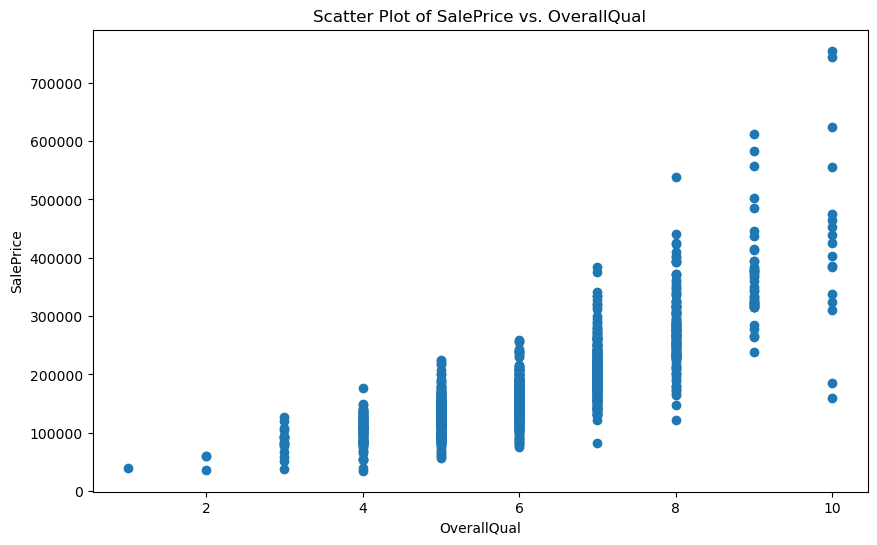

In [80]:
# use scatter plots to examine the relationships between key independent variables and SalePrice.

# Scatter plot between SalePrice and GrLivArea
plt.figure(figsize=(10, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('Scatter Plot of SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot between SalePrice and TotalBsmtSF
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.title('Scatter Plot of SalePrice vs. TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot between SalePrice and OverallQual
plt.figure(figsize=(10, 6))
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.title('Scatter Plot of SalePrice vs. OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\krishnakumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

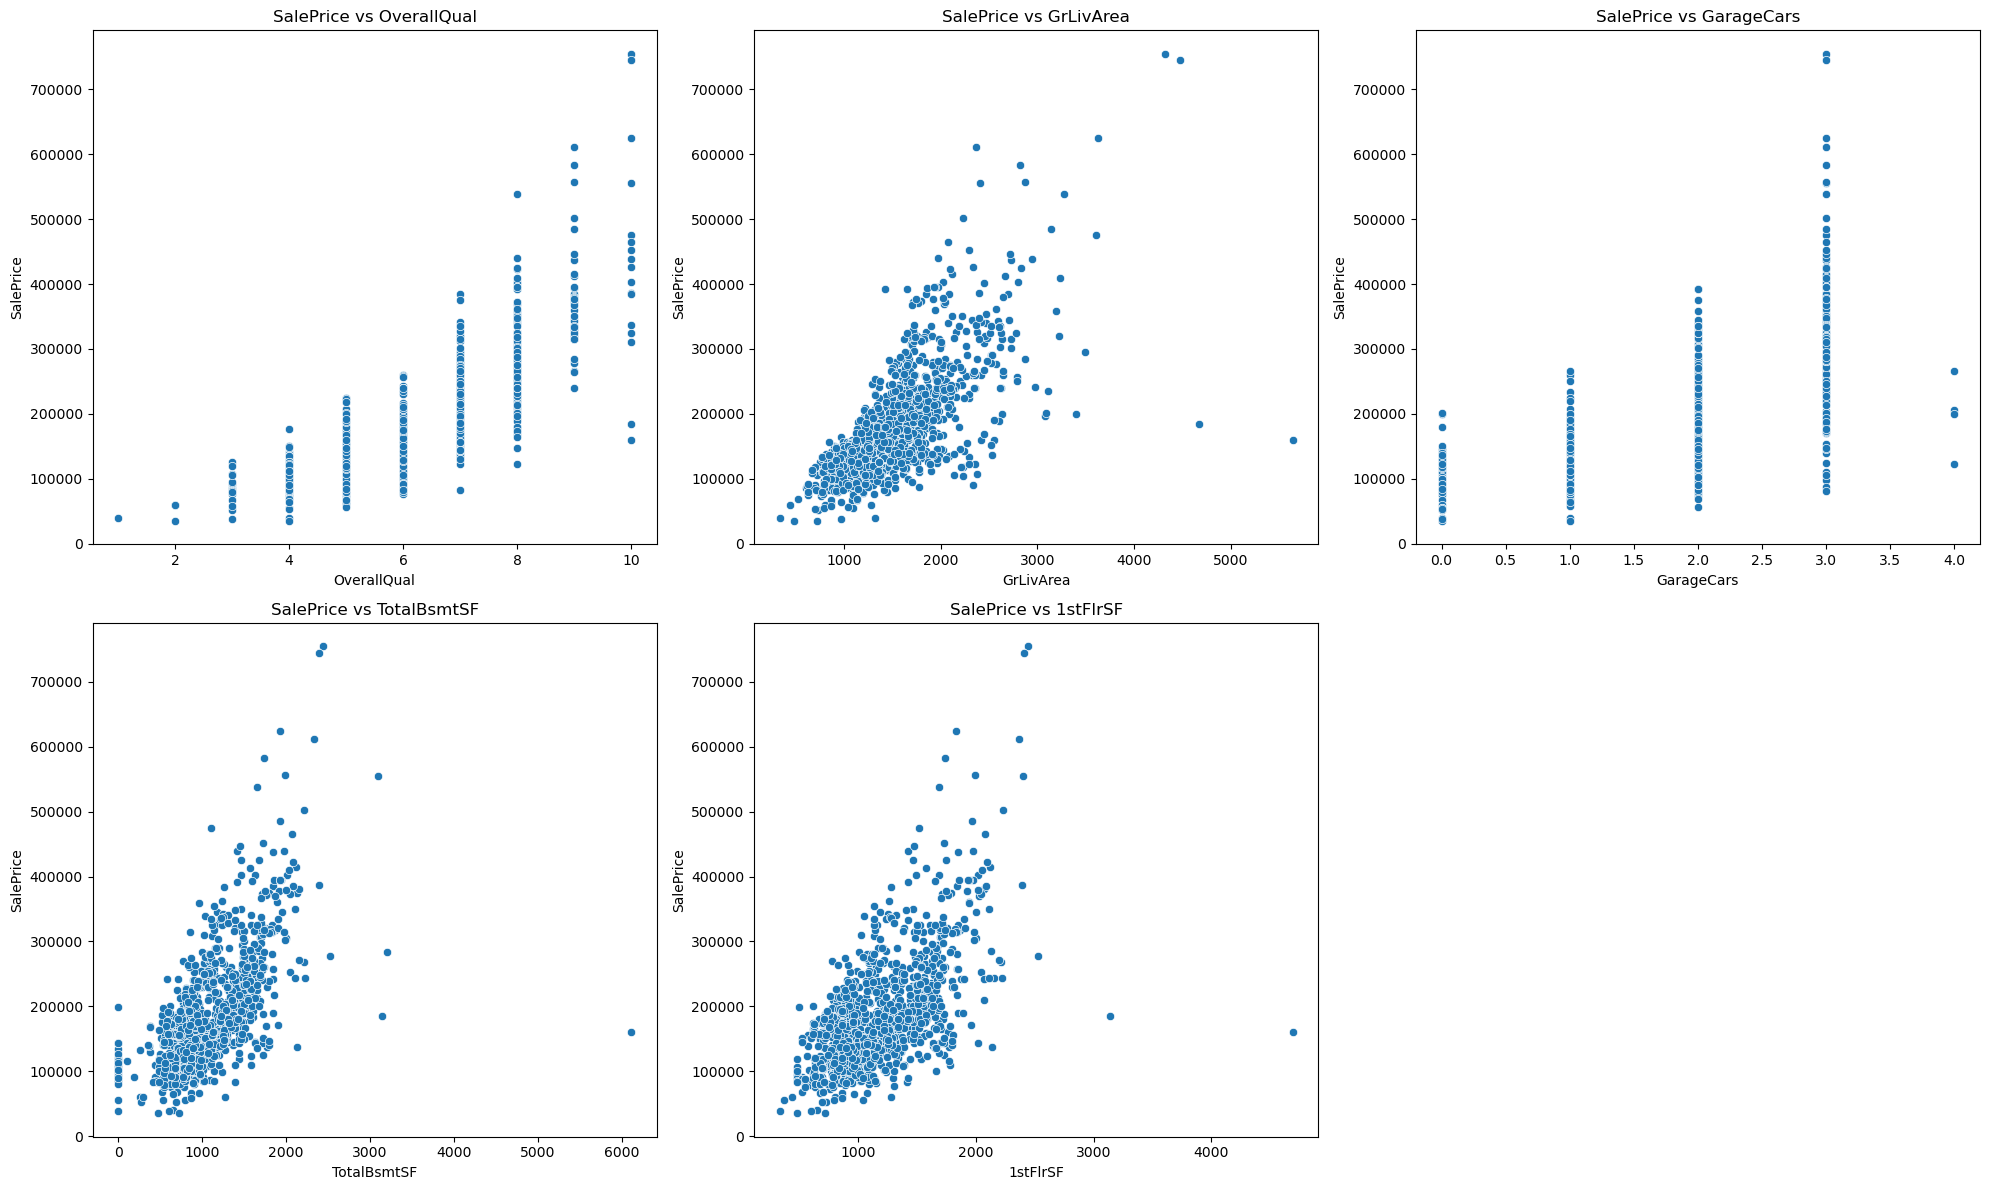

In [81]:
# Select key variables for scatter plots
key_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

# Plot scatter plots
plt.figure(figsize=(20, 12))
for i, var in enumerate(key_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(f'SalePrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1201 non-null   int64  
 1   MSSubClass     1201 non-null   int64  
 2   MSZoning       1201 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1201 non-null   int64  
 5   Street         1201 non-null   object 
 6   Alley          1201 non-null   object 
 7   LotShape       1201 non-null   object 
 8   LandContour    1201 non-null   object 
 9   Utilities      1201 non-null   object 
 10  LotConfig      1201 non-null   object 
 11  LandSlope      1201 non-null   object 
 12  Neighborhood   1201 non-null   object 
 13  Condition1     1201 non-null   object 
 14  Condition2     1201 non-null   object 
 15  BldgType       1201 non-null   object 
 16  HouseStyle     1201 non-null   object 
 17  OverallQual    1201 non-null   int64  
 18  OverallCond  

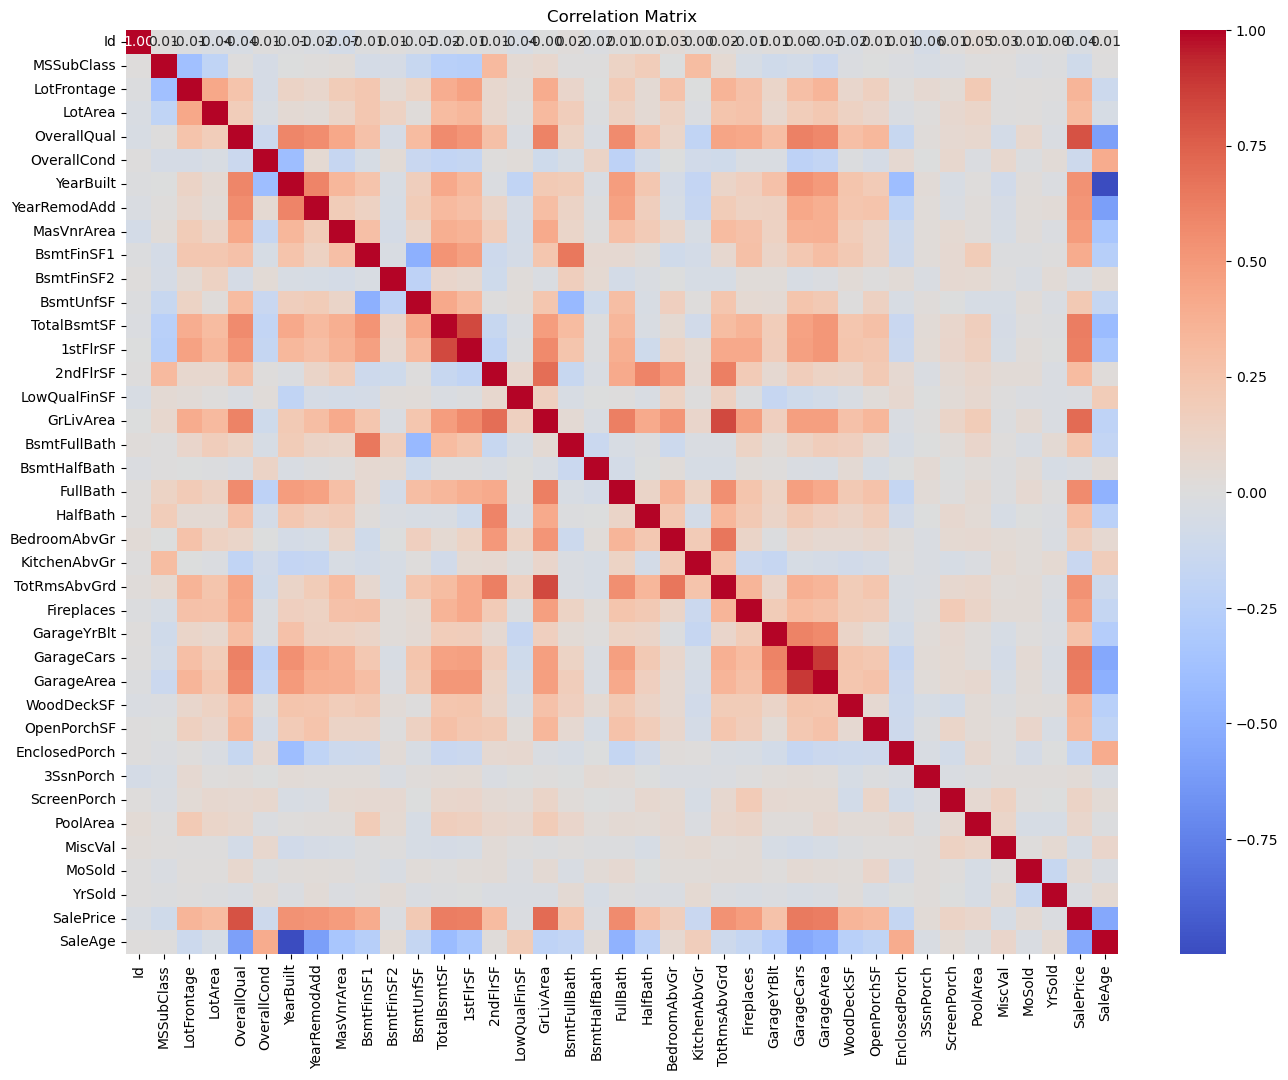

In [83]:
df_numeric = df.select_dtypes(include=['float', 'int'])
corr_matrix = df_numeric.corr()
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [84]:
# Define the selected features based on correlation analysis
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd'
]

# Add target variable to selected features
selected_features.append('SalePrice')

# Create a new dataset with only the selected features
data_selected = df_dummies[selected_features]

# Define the features and the target variable
X = data_selected.drop(columns=['SalePrice'])
y = data_selected['SalePrice']

## Split the data into training and testing sets

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the features

In [86]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge Regression

In [87]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]})

## Lasso Regression

In [88]:
# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]})

In [89]:
# Best parameters
ridge_best_alpha = ridge_cv.best_params_['alpha']
lasso_best_alpha = lasso_cv.best_params_['alpha']

## Predictions and evaluations

In [90]:
# Predictions and evaluations
ridge_best_model = ridge_cv.best_estimator_
lasso_best_model = lasso_cv.best_estimator_

ridge_preds = ridge_best_model.predict(X_test_scaled)
lasso_preds = lasso_best_model.predict(X_test_scaled)

ridge_rmse = mean_squared_error(y_test, ridge_preds, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_preds, squared=False)

ridge_r2 = r2_score(y_test, ridge_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

ridge_best_alpha, lasso_best_alpha, ridge_rmse, lasso_rmse, ridge_r2, lasso_r2

(100,
 1000,
 42420.078513023,
 41536.54566801777,
 0.7992349393079067,
 0.8075109847189629)